# Task 2: The Sparks Foundation MAY'21
**Topic: Prediction using Unsupervised ML**

**Description**: From the given ‘Iris’ dataset, predict the optimum number of clusters
                 and represent it visually.
                 
**Goal**: To perform exploratory data analysis on the data and build KMeans clustering model to cluster them into groups.
          Here we have assumed that we do not have species column to form the clusters and then used it to check our model               performance.
          
**Dataset Used**: https://bit.ly/3kXTdox

**Done By** : Subham Saha, Data Science and Business Analytics Intern May'21 

K-means clustering is a partitioning approach for unsupervised statistical learning.

### Importing necessary libraries

In [1]:
import pandas as pd #read dataframe eg. excel,csv files 
import numpy as np # linear algebra
import matplotlib.pyplot as plt #plotting graphs
%matplotlib inline 
import sklearn
print("libraries imported successfully")

libraries imported successfully


In [2]:
url = "E:/Python projects/TSF/Iris.csv"
df = pd.read_csv(url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df_1= df.drop(columns="Species",axis=1)
y= df.Species
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
target= LE.fit_transform(y)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
#Removing the id and species columns, since they are not required.Also, species column or target column would
#not be present in real life dataset 
df_new = df.copy()
df_new = df_new[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',  'PetalWidthCm']]
df_new.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df_new.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Determining optimum number of clusters (ELBOW METHOD)

To calculate WCSS(Within cluster sum of squares), you first find the Euclidean distance (see figure below) 
between a given point and the centroid to which it is assigned. You then iterate this process for all points 
in the cluster, andthen sum the values for the cluster and divide by the number of points. Finally, you calculate
the average across all clusters. This will give you the average WCSS.

![](https://www.tutorialexample.com/wp-content/uploads/2020/05/Euclidean-distance-in-tensorflow.png)

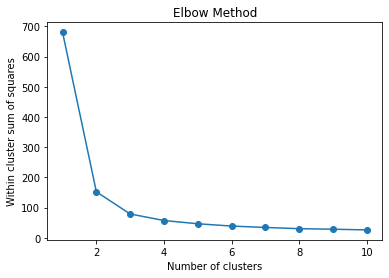

In [7]:
#Elbow method
x = df_new.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11): #No of clusters
        a = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init  = 10, random_state= 1 )
        a.fit(x) #Train the model
        wcss.append(a.inertia_) # Inertia: It is the sum of squared distances of samples to their closest cluster 
                                     # center.
# Plotting the value
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

**We can observe from the above graph is that after the 3rd cluster, variance or wcss is not dropping significantly,so we
will take 3 as optimum number of clusters**

In [8]:
# Applying KMeans algorithm to the dataset

b= KMeans(n_clusters = 3, init= 'k-means++', max_iter= 500, n_init= 10, random_state= 1 )
y_kmeans=b.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [9]:
b.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

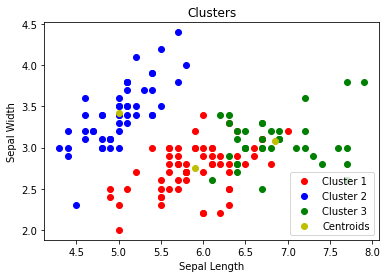

In [10]:
# Visualising the clusters for Sepal length and Sepal width
#x[y_kmeans==0,0] means find all the rows of x such that y== 0(since we have assigned) for the first column(sepal length)
#x[y_kmeans==0,1] means find all the rows of x such that y== 0(since we have assigned) for the second column(sepal width)

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],c= 'red',label= 'Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],c= 'blue',label= 'Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],c= 'green',label= 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(b.cluster_centers_[:,0], b.cluster_centers_[:,1], c='y', label='Centroids')
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clusters')
plt.show()

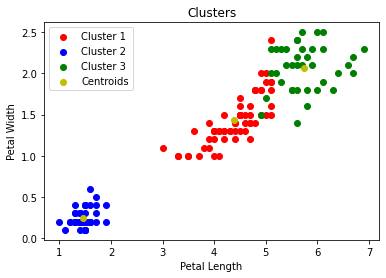

In [11]:
# Visualising the clusters for Petal length and Petal width


plt.scatter(x[y_kmeans==0,2],x[y_kmeans==0,3],c= 'red',label= 'Cluster 1')
plt.scatter(x[y_kmeans==1,2],x[y_kmeans==1,3],c= 'blue',label= 'Cluster 2')
plt.scatter(x[y_kmeans==2,2],x[y_kmeans==2,3],c= 'green',label= 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(b.cluster_centers_[:,2], b.cluster_centers_[:,3], c='y', label='Centroids')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Clusters')
plt.show()

# Comparing Predicted And Actual Plots

**Comparing Sepal plots for predicted and actual**

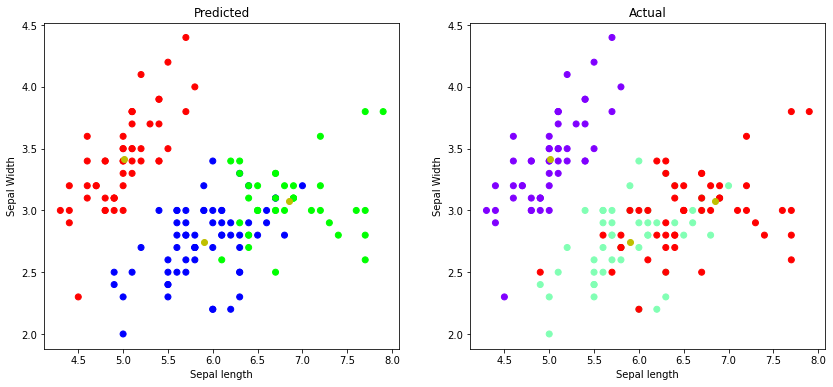

In [33]:
fig,axes= plt.subplots(1,2,figsize=(14,6))
axes[0].scatter(x=df['SepalLengthCm'],y=df['SepalWidthCm'],c=y_kmeans, cmap='brg')
axes[1].scatter(x=df['SepalLengthCm'],y=df['SepalWidthCm'],c=target,cmap='rainbow')
axes[0].scatter(b.cluster_centers_[:,0], b.cluster_centers_[:,1], c='y', label='Centroids')
axes[1].scatter(b.cluster_centers_[:,0], b.cluster_centers_[:,1], c='y', label='Centroids')
axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal Width')
axes[0].set_title('Predicted')
axes[1].set_xlabel('Sepal length')
axes[1].set_ylabel('Sepal Width')
axes[1].set_title('Actual')
plt.show()

**Inference: Predicted clusters for the Sepal length and Sepal width are more distinct compare to the Actual clusters.**

**Comparing Petal plots for predicted and Actual**

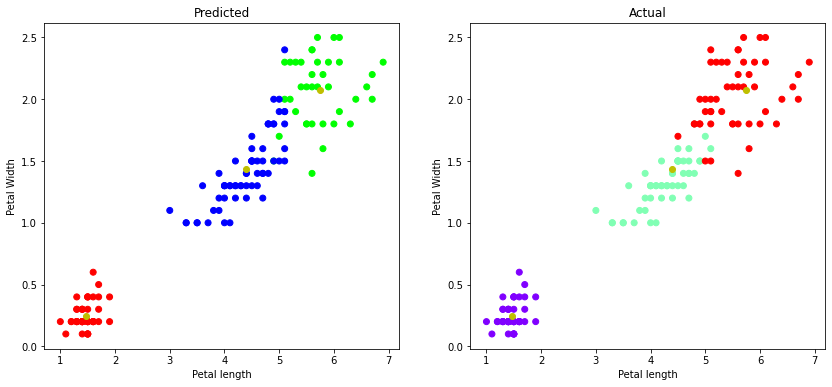

In [34]:
fig,axes= plt.subplots(1,2,figsize=(14,6))
axes[0].scatter(x=df['PetalLengthCm'],y=df['PetalWidthCm'],c=y_kmeans, cmap='brg')
axes[1].scatter(x=df['PetalLengthCm'],y=df['PetalWidthCm'],c=target,cmap='rainbow')
axes[0].scatter(b.cluster_centers_[:,2], b.cluster_centers_[:,3], c='y', label='Centroids')
axes[1].scatter(b.cluster_centers_[:,2], b.cluster_centers_[:,3], c='y', label='Centroids')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal Width')
axes[0].set_title('Predicted')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal Width')
axes[1].set_title('Actual')
plt.show()

**Conclusion: By comparing the Sepal plots and Petal plots, it was inferred that it is better to cluster with Petal plots. As Clusters are well distinct from each other with clearly visible centroids**